<a href="https://colab.research.google.com/github/2unnifemi/SG_COHORT-1.4/blob/main/IBM_EMPLOYEE_DATA__ANALYSIS__PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

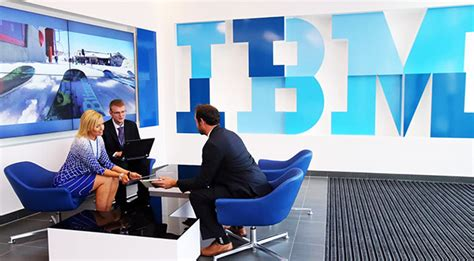

# **TABLE OF CONTENT**
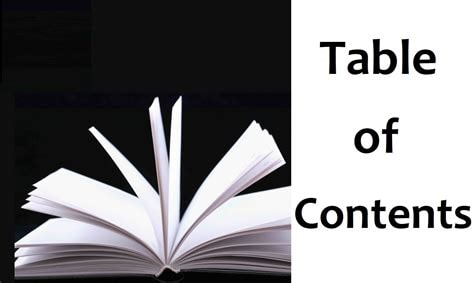

1. DATA DESCRIPTION 
>1.1 PROJECT OVERVIEW<br>1.2 WHY THIS PROJECT <br> 1.3 PROJECT INTRODUCTION<br> 1.4 PROJECT INFORMATION
2. ARTILLERIES
>2.1 IMPORT LIBRARIES<br> 2.2 LOAD DATA SET
3. EXPLORATORY DATA ANALYSIS
>3.1 DATA CLEANING<br>3.2 DATA VISUALIZATION<br> 3.3 SOLUTIONS TO PROJECT QUESTION.
4. REFERENCES.

# 1. DATA DESCRIPTION 

## 1.1 Project Overview
 * This project is broken down into various stages, the breakdown is structured based on my learning journey and experience to give me a unified process. The aim of this project is for me to master everything I have learnt  using this project. Details on the project are seen below.

 * Data can be found [here](https://drive.google.com/file/d/13cdx4kWB6-WZe1VTjPqnFRgYzzGZHt2x/view?usp=sharing)

## 1.2 Why this Project?

In this project, i'm to go through the sql query writing, data analysis process and data visualization process. This will enable me to have an overview of the end to end process in data analysis.
I'm to use the Python libraries NumPy, pandas, and Matplotlib, (and whichever i find most suitable for my use case). The aim is simple, i'm to use whatever i have at my disposal to get it done, provided it is within the context of python or sql. Depending on the task


## 1.3 PROJECT Introduction

In this project, i will extract, clean and visualize the dataset from IBM employee attribution and the possible factors for employee attrition. The task is seen below: 
Using the attr_data.db, extract all the data from the only table in the database using SQL. Once the data is extracted, import the data into Pandas and continue with the analysis. 
The following questions should be answered:

* What do you think are the 3 factors behind employee attrition?
* What is the relationship between Education and Monthly Income?
* What is the effect of age on attrition?
* Is Income the main factor in employee attrition?
* How does work-life balance impact the overall attrition rate?



 ## 1.4 PROJECT INFORMATION
  
  * Education : 
        "1": "Below College",
        "2": "College",
        "3": "Bachelor",
        "4": "Master",
        "5": "Doctor"
  * EnvrionmentSatisfaction : 
        "1": "Low",
        "2": "Medium",
        "3": "High",
        "4": "Very High"
    
  * JobInvolvement : 
        "1": "Low",
        "2": "Medium",
        "3": "High",
        "4": "Very High"
    
  * JobSatisfaction : 
        "1": "Low",
        "2": "Medium",
        "3": "High",
        "4": "Very High"
    
  * PerformanceRating : 
        "1": "Low",
        "2": "Good",
        "3": "Excellent",
        "4": "Outstanding"
    
  * RelationshipSatisfaction: 
        "1": "Low",
        "2": "Good",
        "3": "Excellent",
        "4": "Outstanding"
    
  * WorkLifeBalance: 
        "1": "Bad",
        "2": "Good",
        "3": "Better",
        "4": "Best"
    


## 2. ARTILLERIES 

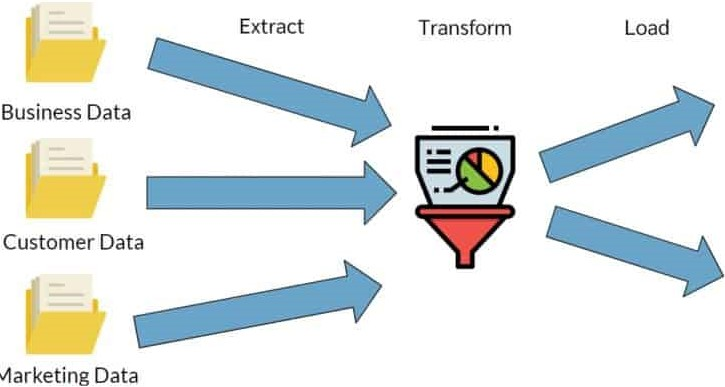

## 2.1 IMPORTATION OF LIBRARIES 

In [ ]:
# importing python libraries
import pandas as pd 
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import itertools
import re
import json
import seaborn as sns

## 2.2 LOAD DATASET


In [ ]:
# Using sqlite for extraction of database file to the workspace.
conn = sqlite3.connect("attr_data.db")

In [ ]:
cursor = conn.cursor()

In [ ]:
#saving the whole data into a variable
sql_query = """ SELECT * FROM attrition_records 
            
"""

In [ ]:
# Using pandas to show the table arranged in rows and columns. Also saving the result into variable df.
df = pd.DataFrame(index=np.arange(5), columns=np.arange(30))
df = pd.read_sql_query(sql_query, conn)


In [ ]:
# using pandas to show the data 
pd.set_option('display.max_columns', None)
df.head()

,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel...,1102,Sales,1,2,Life S...,1,1,2,Female,94,3,2,Sales ...,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,2,49,No,Travel...,279,Resear...,8,1,Life S...,1,2,3,Male,61,2,2,Resear...,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,3,37,Yes,Travel...,1373,Resear...,2,2,Other,1,4,4,Male,92,2,1,Labora...,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,4,33,No,Travel...,1392,Resear...,3,4,Life S...,1,5,4,Female,56,3,1,Resear...,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,5,27,No,Travel...,591,Resear...,2,1,Medical,1,7,1,Male,40,3,1,Labora...,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
# To show all column and row
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 1000
pd.options.display.max_colwidth=10

## 3. EXPLORATORY DATA ANALYSIS(EDA)

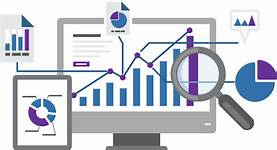

## 3.1 DATA CLEANING 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1470 non-null   int64 
 1   Age                       1470 non-null   int64 
 2   Attrition                 1470 non-null   object
 3   BusinessTravel            1470 non-null   object
 4   DailyRate                 1470 non-null   int64 
 5   Department                1470 non-null   object
 6   DistanceFromHome          1470 non-null   int64 
 7   Education                 1470 non-null   int64 
 8   EducationField            1470 non-null   object
 9   EmployeeCount             1470 non-null   int64 
 10  EmployeeNumber            1470 non-null   int64 
 11  EnvironmentSatisfaction   1470 non-null   int64 
 12  Gender                    1470 non-null   object
 13  HourlyRate                1470 non-null   int64 
 14  JobInvolvement          

* There are 1470 rows and 36 columns.Out of the 36 columns there are 27 numerical and 9 discrete columns with no missing value in the dataset.

In [ ]:
df.describe()

,id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.0...,1470.0...,1470.0...,1470.0...,1470.0...,1470.0,1470.0...,1470.0...,1470.0...,1470.0...,1470.0...,1470.0...,1470.0...,1470.0...,1470.0...,1470.0...,1470.0...,1470.0...,1470.0,1470.0...,1470.0...,1470.0...,1470.0...,1470.0...,1470.0...,1470.0...,1470.0...
mean,735.50...,36.923810,802.48...,9.192517,2.912925,1.0,1024.8...,2.721769,65.891156,2.729932,2.063946,2.728571,6502.9...,14313....,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.49...,9.135373,403.50...,8.106864,1.024165,0.0,602.02...,1.093082,20.329428,0.711561,1.106940,1.102846,4707.9...,7117.7...,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,102.00...,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.0...,2094.0...,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.25...,30.000000,465.00...,2.000000,2.000000,1.0,491.25...,2.000000,48.000000,2.000000,1.000000,2.000000,2911.0...,8047.0...,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.50...,36.000000,802.00...,7.000000,3.000000,1.0,1020.5...,3.000000,66.000000,3.000000,2.000000,3.000000,4919.0...,14235....,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.7...,43.000000,1157.0...,14.000000,4.000000,1.0,1555.7...,4.000000,83.750000,3.000000,3.000000,4.000000,8379.0...,20461....,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.0...,60.000000,1499.0...,29.000000,5.000000,1.0,2068.0...,4.000000,100.00...,4.000000,5.000000,4.000000,19999....,26999....,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
df_summary = df.groupby('Attrition')
df_summary.mean().T

Attrition,No,Yes
id,737.42...,725.46...
Age,37.561233,33.607595
DailyRate,812.50...,750.36...
DistanceFromHome,8.915653,10.632911
Education,2.927007,2.839662
EmployeeCount,1.000000,1.000000
EmployeeNumber,1027.6...,1010.3...
EnvironmentSatisfaction,2.771290,2.464135
HourlyRate,65.952149,65.573840
JobInvolvement,2.770479,2.518987


In [ ]:
#making a copy of the data to prevent errors.
dfcopy= df.copy()

## 3.2 DATA VISUALIZATION

* Attrition Graph to show the rate in which people are leaving the company

In [ ]:
# To show the amount of people that left.
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

Text(0.5, 1.0, 'Attrition Bar Chart')

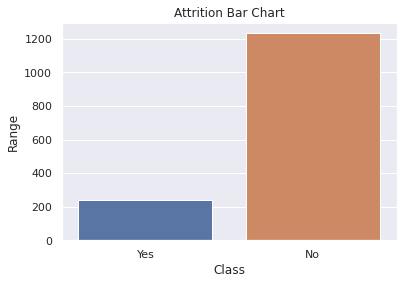

In [ ]:
sns.countplot(data=df,x="Attrition")
plt.xlabel('Class')
plt.ylabel('Range')
plt.title("Attrition Bar Chart")

From the dataset the amount of employee that left the company are (Yes) 237 and(No) 1233 stayed

In [ ]:
dfcopy.corr()

,id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
id,1.000000,-0.010349,-0.051484,0.032928,0.041901,NaN,0.999906,0.017424,0.034754,-0.007105,-0.018041,-0.045941,-0.014377,0.012355,-0.000689,-0.013369,-0.020675,-0.069654,NaN,0.062452,-0.014095,0.023907,0.010740,-0.011557,-0.008853,-0.009151,-0.009432
Age,-0.010349,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,-0.051484,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,0.032928,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.041901,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,0.999906,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,-0.014829,0.012648,-0.001251,-0.012944,-0.020359,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.017424,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.034754,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,-0.002172,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,-0.007105,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,-0.029071,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976


Text(0.5, 1.0, 'Heatmap of correlation')

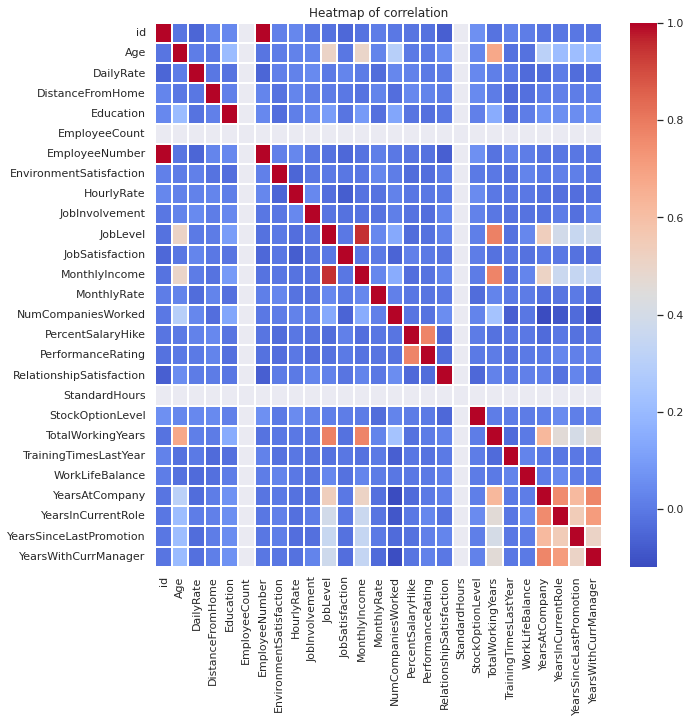

In [ ]:
# Correlation heatmap of the whole dataset
plt.figure(figsize=(10,10))
data_corr= dfcopy.corr()
sns.heatmap(data_corr,annot=False,fmt=".1f",cmap="coolwarm",linewidth=1)
plt.title("Heatmap of correlation")

* Changing Attrition from Yes and No to 1:0 in the copied data.


In [ ]:
dfcopy.head()

,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel...,1102,Sales,1,2,Life S...,1,1,2,Female,94,3,2,Sales ...,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,2,49,No,Travel...,279,Resear...,8,1,Life S...,1,2,3,Male,61,2,2,Resear...,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,3,37,Yes,Travel...,1373,Resear...,2,2,Other,1,4,4,Male,92,2,1,Labora...,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,4,33,No,Travel...,1392,Resear...,3,4,Life S...,1,5,4,Female,56,3,1,Resear...,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,5,27,No,Travel...,591,Resear...,2,1,Medical,1,7,1,Male,40,3,1,Labora...,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
dfcopy['Attrition']= dfcopy.Attrition.map(dict(Yes=1,No=0))
dfcopy.head()# to confirm

,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,1,Travel...,1102,Sales,1,2,Life S...,1,1,2,Female,94,3,2,Sales ...,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,2,49,0,Travel...,279,Resear...,8,1,Life S...,1,2,3,Male,61,2,2,Resear...,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,3,37,1,Travel...,1373,Resear...,2,2,Other,1,4,4,Male,92,2,1,Labora...,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,4,33,0,Travel...,1392,Resear...,3,4,Life S...,1,5,4,Female,56,3,1,Resear...,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,5,27,0,Travel...,591,Resear...,2,1,Medical,1,7,1,Male,40,3,1,Labora...,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


This will help to show the correlation between Attrition and other columns 

* Splitting  the data into numerical and discrete set

In [ ]:
numerical_vars = [var for var in dfcopy.columns if dfcopy[var].dtype != "O"]
discrete_vars = [var for var in dfcopy.columns if dfcopy[var].dtype == "O"]
numerical_vars,discrete_vars

(['id',
  'Age',
  'Attrition',
  'DailyRate',
  'DistanceFromHome',
  'Education',
  'EmployeeCount',
  'EmployeeNumber',
  'EnvironmentSatisfaction',
  'HourlyRate',
  'JobInvolvement',
  'JobLevel',
  'JobSatisfaction',
  'MonthlyIncome',
  'MonthlyRate',
  'NumCompaniesWorked',
  'PercentSalaryHike',
  'PerformanceRating',
  'RelationshipSatisfaction',
  'StandardHours',
  'StockOptionLevel',
  'TotalWorkingYears',
  'TrainingTimesLastYear',
  'WorkLifeBalance',
  'YearsAtCompany',
  'YearsInCurrentRole',
  'YearsSinceLastPromotion',
  'YearsWithCurrManager'],
 ['BusinessTravel',
  'Department',
  'EducationField',
  'Gender',
  'JobRole',
  'MaritalStatus',
  'Over18',
  'OverTime'])

In [ ]:
# correlation between the numerical columns
dfcopy_num =dfcopy[numerical_vars]
dfcopy_num.corr()

,id,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
id,1.000000,-0.010349,-0.010369,-0.051484,0.032928,0.041901,NaN,0.999906,0.017424,0.034754,-0.007105,-0.018041,-0.045941,-0.014377,0.012355,-0.000689,-0.013369,-0.020675,-0.069654,NaN,0.062452,-0.014095,0.023907,0.010740,-0.011557,-0.008853,-0.009151,-0.009432
Age,-0.010349,1.000000,-0.159205,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.010369,-0.159205,1.000000,-0.056652,0.077924,-0.031373,NaN,-0.010577,-0.103369,-0.006846,-0.130016,-0.169105,-0.103481,-0.159840,0.015170,0.043494,-0.013478,0.002889,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
DailyRate,-0.051484,0.010661,-0.056652,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,0.032928,-0.001686,0.077924,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.041901,0.208034,-0.031373,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,0.999906,-0.010145,-0.010577,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,-0.014829,0.012648,-0.001251,-0.012944,-0.020359,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.017424,0.010146,-0.103369,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.034754,0.024287,-0.006846,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,-0.002172,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123


* Second correlation heatmap involving numerical columns.

Text(0.5, 1.0, 'Heatmap of Correlation')

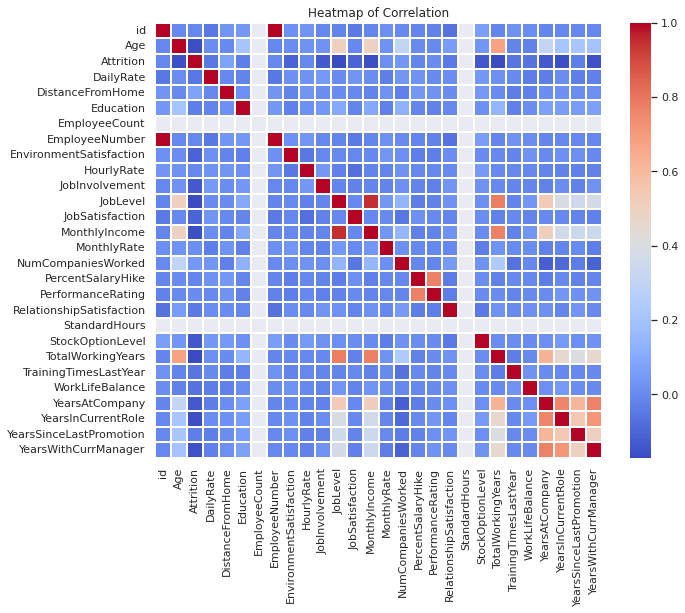

In [ ]:
data_corr1= dfcopy_num.corr()
plt.figure(figsize=(10,8))
sns.heatmap(data_corr1,annot=False,fmt=".1f",cmap="coolwarm",linewidth=1)
plt.title("Heatmap of Correlation")

Dropping unwanted columns from the matrix

In [ ]:
unwanted_col = ['id','EnvironmentSatisfaction','StandardHours','EmployeeCount','EmployeeNumber']
wanted_col=dfcopy_num.drop(columns= unwanted_col)
wanted_col.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,1,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5
1,49,0,279,8,1,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7
2,37,1,1373,2,2,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0
3,33,0,1392,3,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,591,2,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2


Text(0.5, 1.0, 'The Correlation Heatmap of the IBM HR data')

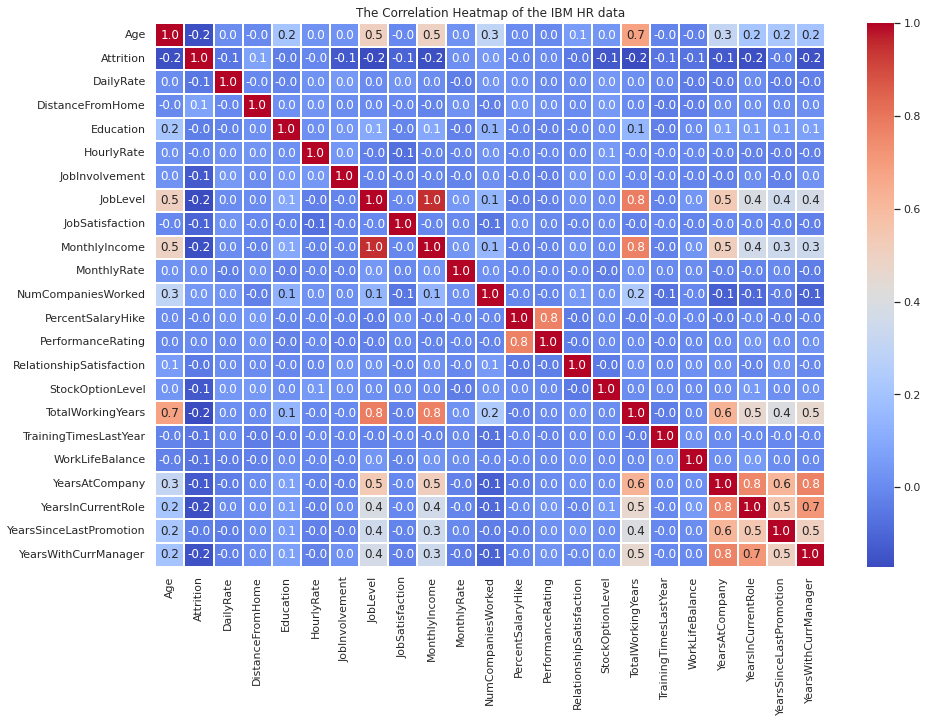

In [ ]:
data_corr2= wanted_col.corr()
plt.figure(figsize=(15,10))
sns.heatmap(data_corr2,annot=True,fmt=".1f",cmap="coolwarm",linewidth=1)
plt.title('The Correlation Heatmap of the IBM HR data')

*italicized text*

## 3.3. SOLUTIONS TO PROJECT QUESTIONS

# What do you think are the 3 factors behind employee attrition?

In [ ]:
# This is to select correlation coefficient from wanted column
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j]) < threshold:
                colname =corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr


corr_factors =correlation(data_corr2,-0.43)
len(set(corr_factors))

3

In [ ]:
corr_factors

{'JobLevel', 'MonthlyIncome', 'TotalWorkingYears'}

Job Level, Monthly Income and Total Working Years are the factors of Employee's Attrition 

* What is the relationship between Education and Monthly Income?

In [ ]:
Relationship = df[['MonthlyIncome','Education']]
Relationship.corr()

,MonthlyIncome,Education
MonthlyIncome,1.000000,0.094961
Education,0.094961,1.000000


Text(0.5, 1.0, 'Relationship between Education and Monthly Income')

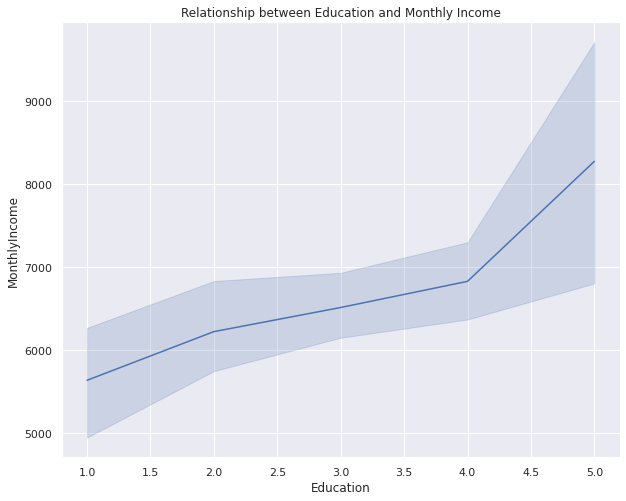

In [ ]:

plt.figure(figsize=(10,8))
sns.set_theme()
sns.lineplot(data=df, x="Education", y="MonthlyIncome")
plt.title("Relationship between Education and Monthly Income")

From the graph the relationship between Monthly Income and Education is they are postively correlated, it's a weak postive correlation (+0.094961) meaning when education increases, monthly Income tends to increase as well, but in a weak or unreliable manner.They are also skewed to the right.

# What is the effect of age on attrition?

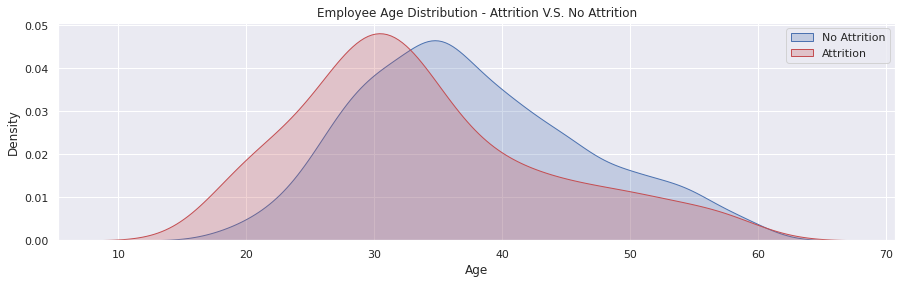

In [ ]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(dfcopy.loc[(dfcopy['Attrition'] == 0),'Age'] , color='b',shade=True,label='No Attrition')
ax=sns.kdeplot(dfcopy.loc[(dfcopy['Attrition'] == 1),'Age'] , color='r',shade=True,label='Attrition')
plt.title('Employee Age Distribution - Attrition V.S. No Attrition')
ax.legend()
plt.show()

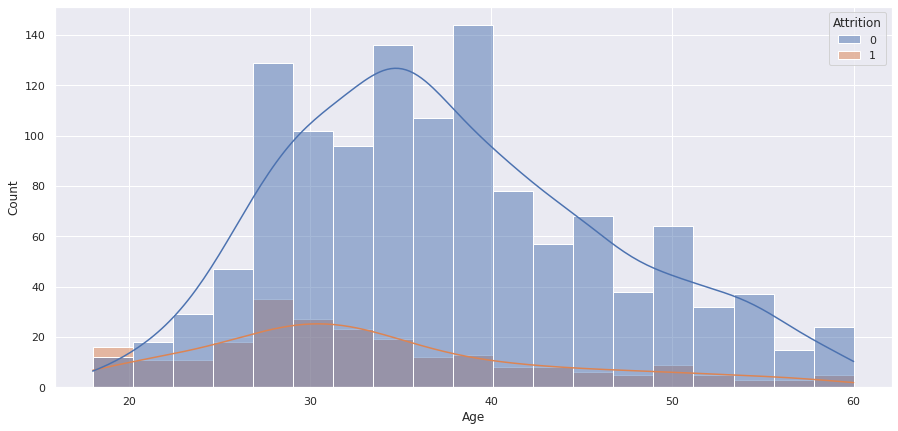

In [ ]:
fig = plt.figure(figsize=(15,7))
sns.histplot(data=dfcopy,x= 'Age',hue='Attrition',kde=True)

From the density chart it shows that it's skewed to the right, employee's below the age of 40 have more chance of attrition.

# Is Income the main factor in employee attrition?

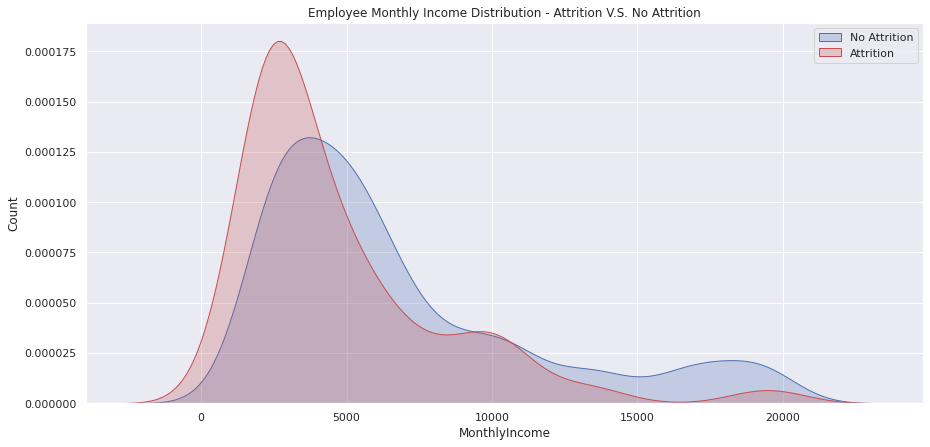

In [ ]:
fig = plt.figure(figsize=(15,7))
ax=sns.kdeplot(dfcopy.loc[(dfcopy['Attrition']==0),"MonthlyIncome"],color="b",shade=True,label="No Attrition")
ax=sns.kdeplot(dfcopy.loc[(dfcopy['Attrition']==1),"MonthlyIncome"],color="r",shade=True,label="Attrition")
plt.title('Employee Monthly Income Distribution - Attrition V.S. No Attrition')
plt.ylabel("Count")
ax.legend()

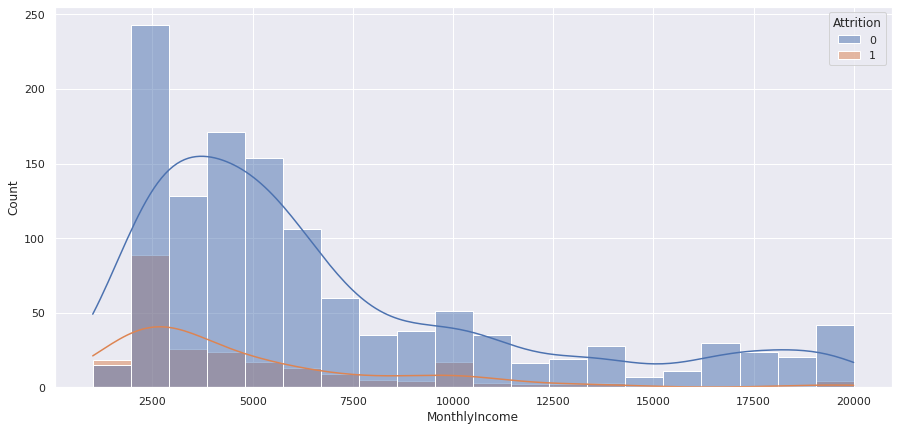

In [ ]:
fig = plt.figure(figsize=(15,7))
sns.histplot(data=dfcopy,x= 'MonthlyIncome',hue='Attrition',kde=True)

From the kde plot and histogram, the Monthly Income column is skewed to the right.
Yes, income can be a main factor of attrition,there is a higher rate of attrition from people below Monthly Income of 7500.


# How does work-life balance impact the overall attrition rate?

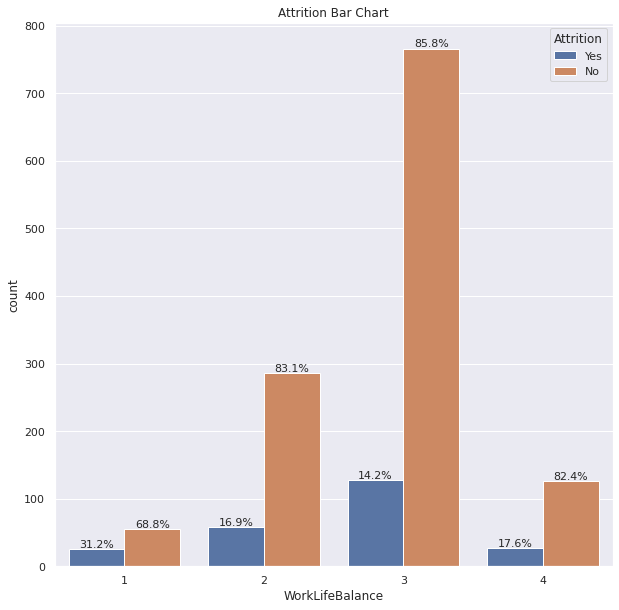

In [ ]:
# To show the percentage rate 
def show_percentage(ax):
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')

fig=plt.figure(figsize=(10,10))
ax=sns.countplot(data=df,x="WorkLifeBalance", hue = "Attrition")
plt.title("Attrition Bar Chart")
show_percentage(ax)
plt.show()

From the graph, Work Life Balance impacts attrition in the following ways. From 1(Low) it's impacts was by 31.2%,in 2(Medium) it's impact was is 16.9%,while 14.2% was the impact on attrition in 3(High) and 17.6% in 4(Very High). Most of the attrition in 1(Low) can be affected because of the Work Life Balance, while in 2(Medium),3(High),4(Very High) other factor can attribute for the reason of attrition. 

## 4.  REFERENCES

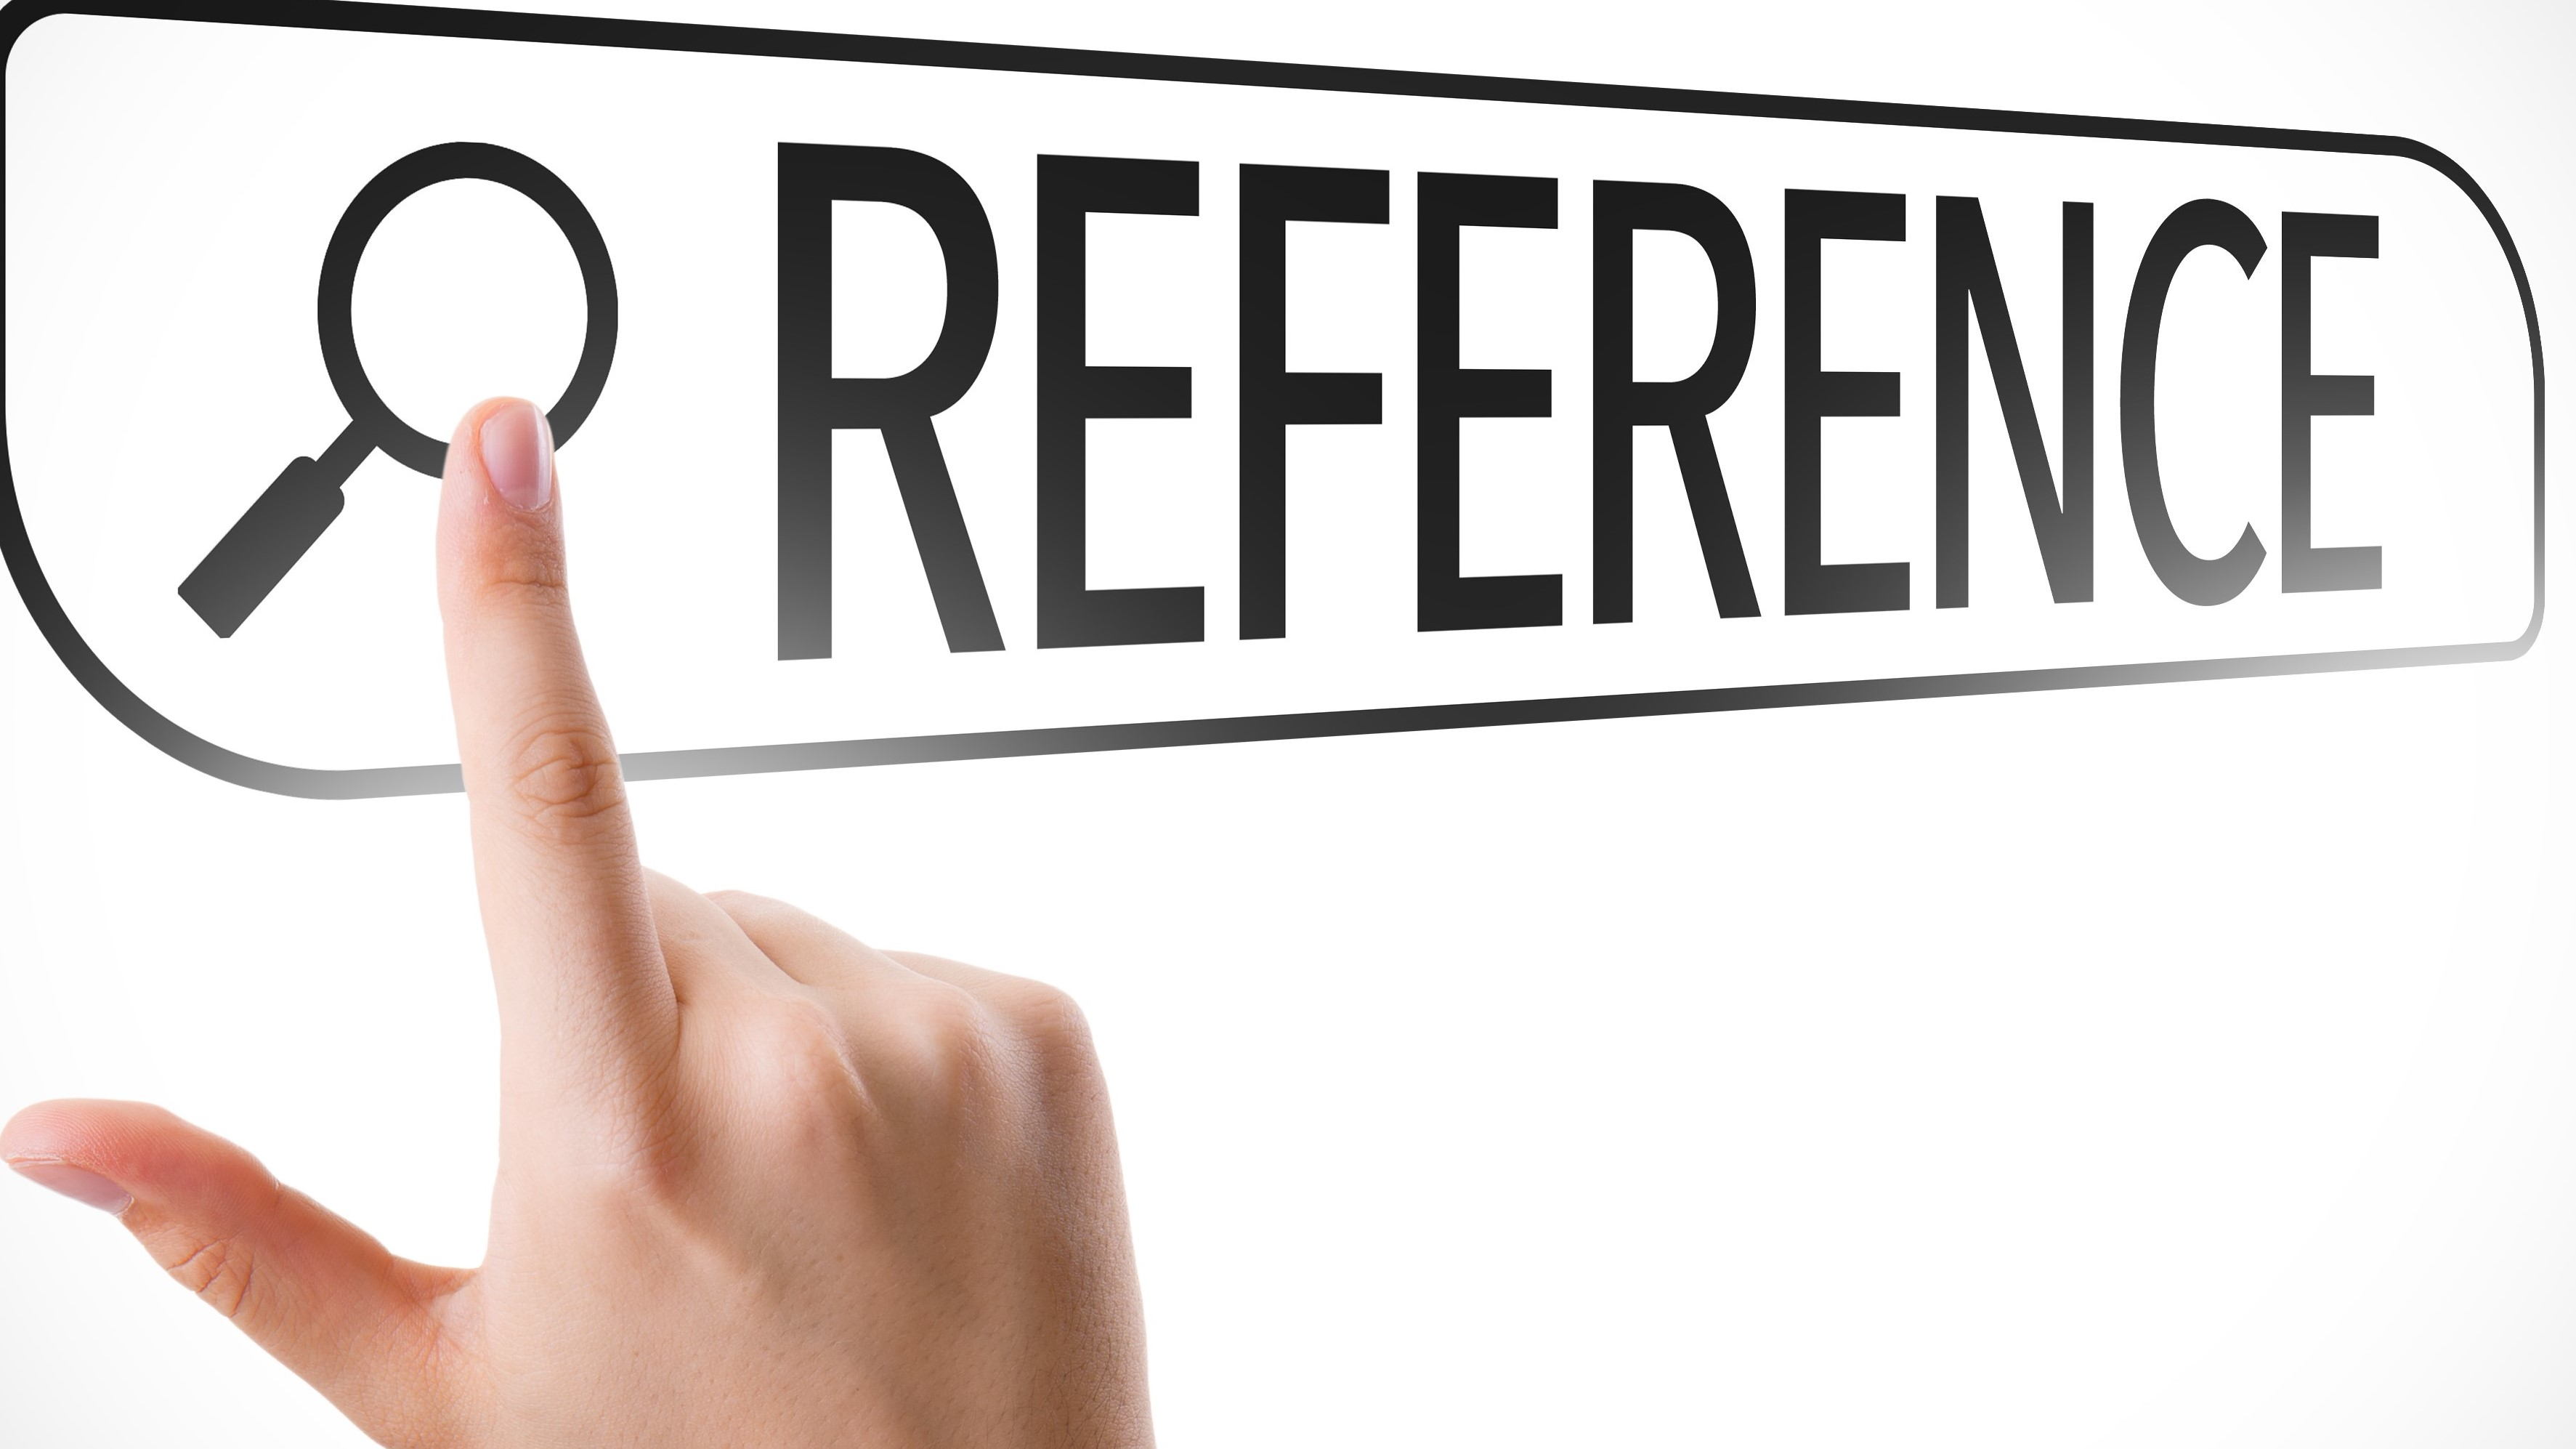

* https://blog.prepscholar.com/skewed-right  23/12/2022
* https://stackoverflow.com/questions/69690399/how-to-add-percentages-on-countplot-in-seaborn 26/12/2022
*https://colab.research.google.com/drive/1RYZFiZtqY_XNRzkYEq40-wMb29f-4m1d?  usp=sharing#scrollTo=LpT6AiCqn2Nm  29/12/2022
*https://matplotlib.org/stable/search.html?q=countplot+#  03/01/2023
* https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py  03/01/2023
* https://stackoverflow.com/questions/39409866/correlation-heatmap 04/01/2023
*  https://www.digitalocean.com/community/tutorials/seaborn-kdeplot  05/01/2023